In [3]:
# Import modules

import matplotlib.pyplot  as plt
import sys,os
import numpy as np
import glob
import seaborn as sns
import gzip
import pickle
import pandas as pd
import mdtraj as md
import pip
import csv
import itertools
import matplotlib.patches as mpatches
from matplotlib.figure import Figure
from matplotlib.ticker import MaxNLocator

In [4]:
sns.set(style="whitegrid", context='paper')
axes_font_size = 42
label_size = 42
title_size = 42
legend_size = 42
plt.rcParams['xtick.labelsize'] = label_size 
plt.rcParams['ytick.labelsize'] = label_size 
plt.rcParams['axes.labelsize'] = axes_font_size
plt.rcParams['axes.titlesize'] = title_size
#plt.rcParams["axes.edgecolor"] = "0.15"
plt.rcParams["axes.linewidth"] = 4
#sns.set_palette("Set2",8)


df1 = pd.read_csv('COLVAR0', sep='\s+', encoding='utf-8', names=['Time','rmsd','cmap_closed','cmap_open','@6.bias', '@6.work'], usecols=['Time','rmsd','cmap_closed','cmap_open','@6.bias', '@6.work'], skiprows=1, skipinitialspace=True)
df2 = pd.read_csv('COLVAR1', sep='\s+', encoding='utf-8', names=['Time','rmsd','cmap_closed','cmap_open','@6.bias', '@6.work'], usecols=['Time','rmsd','cmap_closed','cmap_open','@6.bias', '@6.work'], skiprows=1, skipinitialspace=True)
df3 = pd.read_csv('COLVAR2', sep='\s+', encoding='utf-8', names=['Time','rmsd','cmap_closed','cmap_open','@6.bias', '@6.work'], usecols=['Time','rmsd','cmap_closed','cmap_open','@6.bias', '@6.work'], skiprows=1, skipinitialspace=True)
df4 = pd.read_csv('COLVAR3', sep='\s+', encoding='utf-8', names=['Time','rmsd','cmap_closed','cmap_open','@6.bias', '@6.work'], usecols=['Time','rmsd','cmap_closed','cmap_open','@6.bias', '@6.work'], skiprows=1, skipinitialspace=True)
df5 = pd.read_csv('COLVAR4', sep='\s+', encoding='utf-8', names=['Time','rmsd','cmap_closed','cmap_open','@6.bias', '@6.work'], usecols=['Time','rmsd','cmap_closed','cmap_open','@6.bias', '@6.work'], skiprows=1, skipinitialspace=True)
df6 = pd.read_csv('COLVAR5', sep='\s+', encoding='utf-8', names=['Time','rmsd','cmap_closed','cmap_open','@6.bias', '@6.work'], usecols=['Time','rmsd','cmap_closed','cmap_open','@6.bias', '@6.work'], skiprows=1, skipinitialspace=True)
df7 = pd.read_csv('COLVAR6', sep='\s+', encoding='utf-8', names=['Time','rmsd','cmap_closed','cmap_open','@6.bias', '@6.work'], usecols=['Time','rmsd','cmap_closed','cmap_open','@6.bias', '@6.work'], skiprows=1, skipinitialspace=True)
df8 = pd.read_csv('COLVAR7', sep='\s+', encoding='utf-8', names=['Time','rmsd','cmap_closed','cmap_open','@6.bias', '@6.work'], usecols=['Time','rmsd','cmap_closed','cmap_open','@6.bias', '@6.work'], skiprows=1, skipinitialspace=True)


df1['Time'] = pd.to_numeric(df1['Time'],errors = 'coerce')
df1['Time'] = df1['Time'] /1000
df1['rmsd'] = pd.to_numeric(df1['rmsd'],errors = 'coerce')
df1['rmsd'] = df1['rmsd'] * 10
df1['cmap_open'] = pd.to_numeric(df1['cmap_open'],errors = 'coerce')

df2['Time'] = pd.to_numeric(df2['Time'],errors = 'coerce')
df2['Time'] = df2['Time'] /1000
df2['rmsd'] = pd.to_numeric(df2['rmsd'],errors = 'coerce')
df2['rmsd'] = df2['rmsd'] * 10
df2['cmap_open'] = pd.to_numeric(df2['cmap_open'],errors = 'coerce')

df3['Time'] = pd.to_numeric(df3['Time'],errors = 'coerce')
df3['Time'] = df3['Time'] /1000
df3['rmsd'] = pd.to_numeric(df3['rmsd'],errors = 'coerce')
df3['rmsd'] = df3['rmsd'] * 10
df3['cmap_open'] = pd.to_numeric(df3['cmap_open'],errors = 'coerce')

df4['Time'] = pd.to_numeric(df4['Time'],errors = 'coerce')
df4['Time'] = df4['Time'] /1000
df4['rmsd'] = pd.to_numeric(df4['rmsd'],errors = 'coerce')
df4['rmsd'] = df4['rmsd'] * 10
df4['cmap_open'] = pd.to_numeric(df4['cmap_open'],errors = 'coerce')

df5['Time'] = pd.to_numeric(df5['Time'],errors = 'coerce')
df5['Time'] = df5['Time'] /1000
df5['rmsd'] = pd.to_numeric(df5['rmsd'],errors = 'coerce')
df5['rmsd'] = df5['rmsd'] * 10
df5['cmap_open'] = pd.to_numeric(df5['cmap_open'],errors = 'coerce')

df6['Time'] = pd.to_numeric(df6['Time'],errors = 'coerce')
df6['Time'] = df6['Time'] /1000
df6['rmsd'] = pd.to_numeric(df6['rmsd'],errors = 'coerce')
df6['rmsd'] = df6['rmsd'] * 10
df6['cmap_open'] = pd.to_numeric(df6['cmap_open'],errors = 'coerce')

df7['Time'] = pd.to_numeric(df7['Time'],errors = 'coerce')
df7['Time'] = df7['Time'] /1000
df7['rmsd'] = pd.to_numeric(df7['rmsd'],errors = 'coerce')
df7['rmsd'] = df7['rmsd'] * 10
df7['cmap_open'] = pd.to_numeric(df7['cmap_open'],errors = 'coerce')

df8['Time'] = pd.to_numeric(df8['Time'],errors = 'coerce')
df8['Time'] = df8['Time'] /1000
df8['rmsd'] = pd.to_numeric(df8['rmsd'],errors = 'coerce')
df8['rmsd'] = df8['rmsd'] * 10
df8['cmap_open'] = pd.to_numeric(df8['cmap_open'],errors = 'coerce')


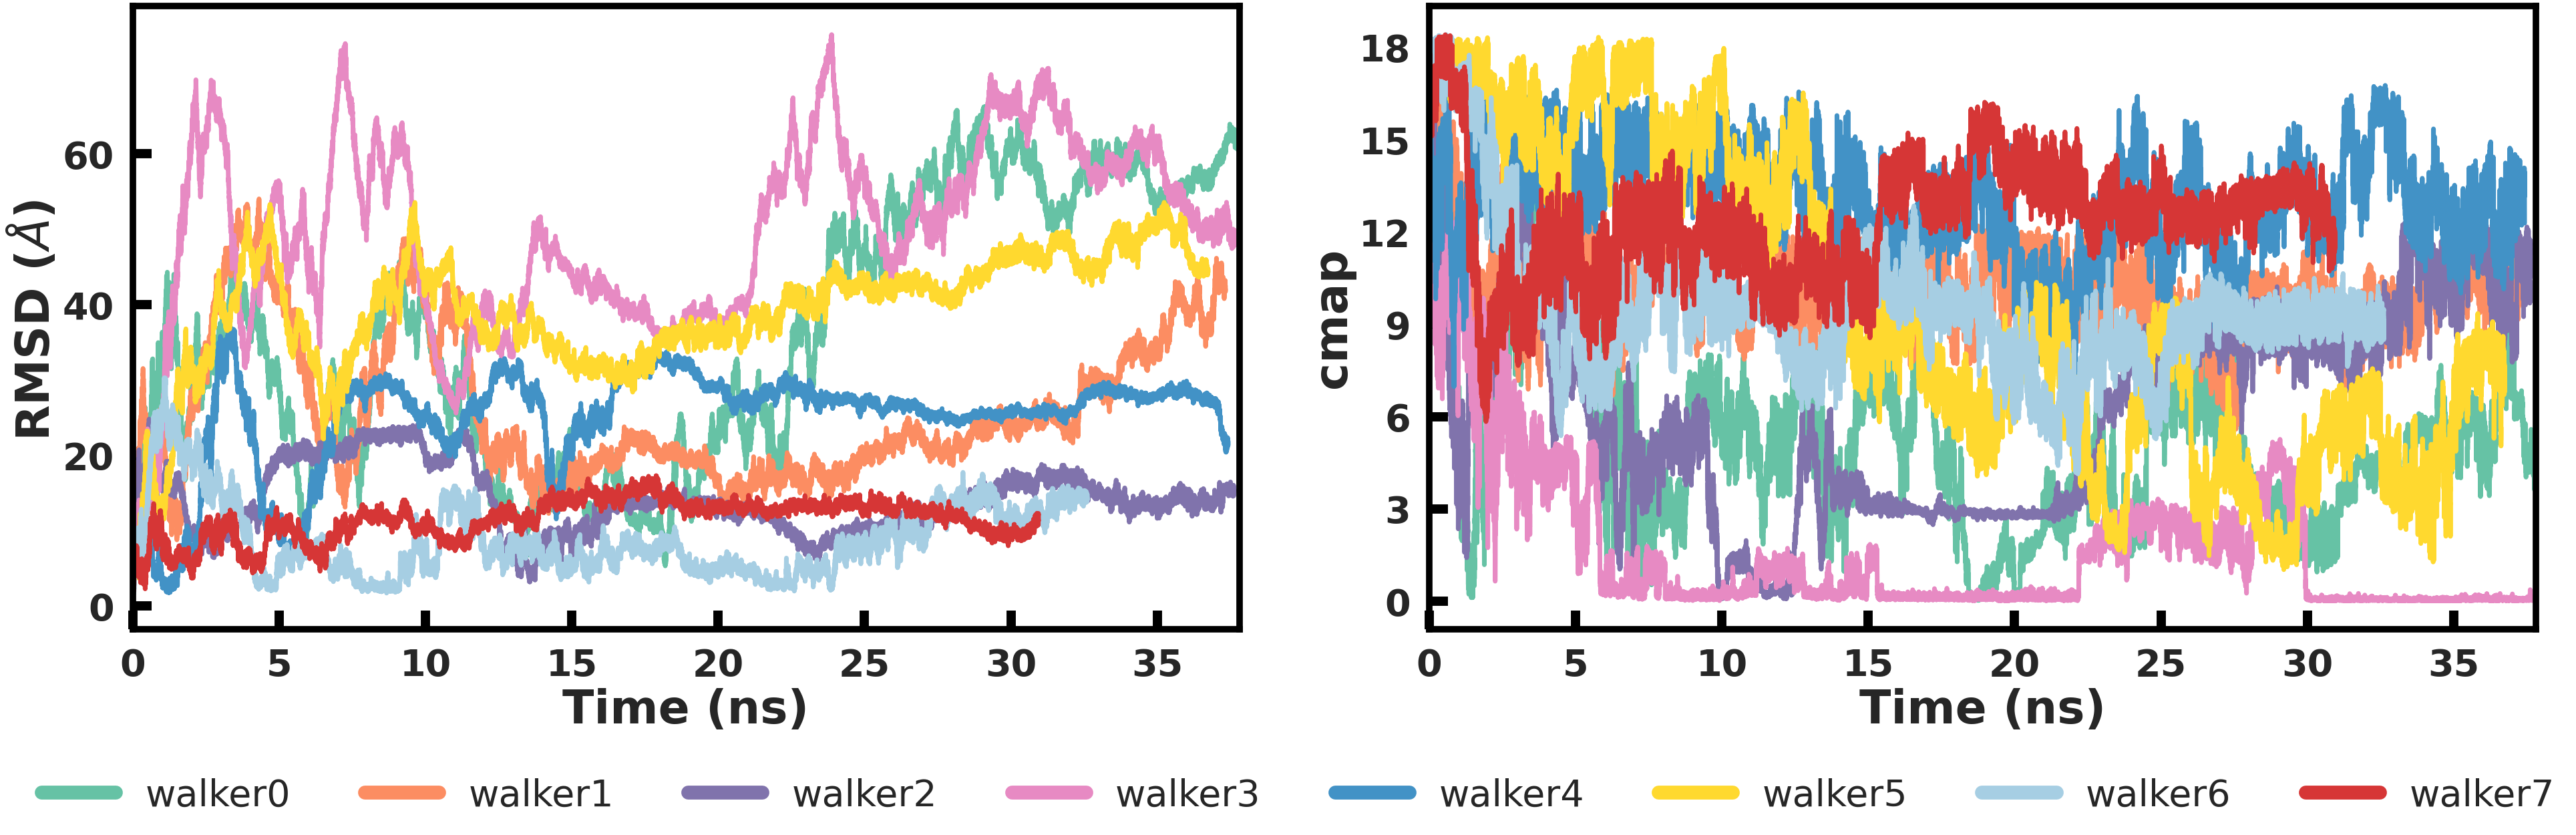

In [18]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots(1, 2, figsize = (40, 13))
ax = ax.flatten()

ax[0].plot(df1['Time'], df1['rmsd'], linewidth = 5, label ='walker0', color='#66c2a5')
ax[0].plot(df2['Time'], df2['rmsd'], linewidth = 5, label ='walker1', color='#fc8d62')
ax[0].plot(df3['Time'], df3['rmsd'], linewidth = 5, label ='walker2',color='#8073ac')
ax[0].plot(df4['Time'], df4['rmsd'], linewidth = 5, label ='walker3',color='#e78ac3')
ax[0].plot(df5['Time'], df5['rmsd'], linewidth = 5, label ='walker4',color='#4292c6')
ax[0].plot(df6['Time'], df6['rmsd'], linewidth = 5, label ='walker5', color='#ffd92f')
ax[0].plot(df7['Time'], df7['rmsd'], linewidth = 5, label ='walker6', color='#a6cee3')
ax[0].plot(df8['Time'], df8['rmsd'], linewidth = 5, label ='walker7', color='#d63636')
ax[0].set_ylabel('RMSD ($\AA$) ',fontweight='bold', fontsize=50)
ax[0].set_xlabel('Time (ns)',fontweight='bold', fontsize=50)
ax[1].plot(df1['Time'], df1['cmap_open'], linewidth = 5, label ='walker0', color='#66c2a5')
ax[1].plot(df2['Time'], df2['cmap_open'], linewidth = 5, label ='walker1',color='#fc8d62')
ax[1].plot(df3['Time'], df3['cmap_open'], linewidth = 5, label ='walker2',color='#8073ac')
ax[1].plot(df4['Time'], df4['cmap_open'], linewidth = 5, label ='walker3', color='#e78ac3')
ax[1].plot(df5['Time'], df5['cmap_open'], linewidth = 5, label ='walker4',color='#4292c6')
ax[1].plot(df6['Time'], df6['cmap_open'], linewidth = 5, label ='walker5', color='#ffd92f')
ax[1].plot(df7['Time'], df7['cmap_open'], linewidth = 5, label ='walker6', color='#a6cee3')
ax[1].plot(df8['Time'], df8['cmap_open'], linewidth = 5, label ='walker7', color='#d63636')
ax[1].set_ylabel('cmap',fontweight='bold', fontsize=50)
ax[1].set_xlabel('Time (ns)',fontweight='bold', fontsize=50)

for a in ax:
    a.autoscale(enable=True, axis='x', tight=True)
    a.grid(False)

    a.spines['top'].set_color('black')
    a.spines['top'].set_linewidth(7)
    a.spines['bottom'].set_color('black')
    a.spines['bottom'].set_linewidth(7)
    a.spines['left'].set_color('black')
    a.spines['left'].set_linewidth(7)
    a.spines['right'].set_color('black')
    a.spines['right'].set_linewidth(7)
    a.xaxis.set_tick_params(which='both', color='black', width=10, length=20, direction='in', bottom=True, top=False)
    a.xaxis.get_ticklines()[0].set_linestyle('dashed')
    a.xaxis.get_ticklines()[0].set_dashes([8, 4])
    a.yaxis.set_tick_params(which='both', color='black', width=10, length=20, direction='in', left=True, right=False)
    a.yaxis.get_ticklines()[0].set_linestyle('dashed')

    # Set the tick formatter to format as integers
    a.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
    a.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
    for tick_label in a.get_xticklabels() + a.get_yticklabels():
        tick_label.set_fontweight('bold')
        tick_label.set_fontsize(40)  # Set tick label font size

    # Adjust tick label padding
    a.tick_params(axis='both', which='both', pad=20)
    
    # Make tick labels bold
    for tick_label in a.get_xticklabels() + a.get_yticklabels():
        tick_label.set_fontweight('bold')


ax[1].yaxis.set_major_locator(MaxNLocator(integer=True))

lines = []
labels = []
  
a = fig.axes[0]
Line, Label = a.get_legend_handles_labels()
 
lines.extend(Line)
labels.extend(Label)
 
  
leg = fig.legend(lines, labels, loc='lower center', ncol=8, prop={'size': 40},bbox_to_anchor=(0.51, -0.05),shadow=False, fontsize=22, markerscale=15, edgecolor='none')
for legobj in leg.legendHandles:
    legobj.set_linewidth(15)

fig.subplots_adjust(bottom=0.5)

#fig.legend(loc='lower center',  ncol=8,prop={'size': 36})


fig.tight_layout(pad=8)

plt.savefig('WT_closed_CV_versus_time_format.png', dpi=200, transparent=False, bbox_inches='tight',format='png')
